<a href="https://colab.research.google.com/github/Murataydinunimi/MarketBasketAnalysis-Pyspark/blob/main/MBA-PySpark-Aydin." target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Finding frequent itemsets (IMDB) <br>
Murat AYDIN<br>
DSE 2021/2022

In [ ]:
# install Java8
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
# download spark3.0.2
!wget -q http://apache.osuosl.org/spark/spark-3.0.3/spark-3.0.3-bin-hadoop3.2.tgz

# unzip it
!tar xf spark-3.0.3-bin-hadoop3.2.tgz
# install findspark 
!pip install -q findspark

In [8]:
!pip install kaggle

In [9]:
# Kaggle API to download the dataset
import os
kaggle_api = {"username":"murataydn","key":"7c7468d4948d474d251b85a914a9cf8e"}
os.environ['KAGGLE_USERNAME'] = kaggle_api['username']
os.environ['KAGGLE_KEY'] = kaggle_api['key'] 

In [10]:
!kaggle datasets download -d bwandowando/ukraine-russian-crisis-twitter-dataset-1-2-m-rows

100% 1.36G/1.37G [00:14<00:00, 110MB/s]
100% 1.37G/1.37G [00:14<00:00, 104MB/s]


In [11]:
!unzip ukraine-russian-crisis-twitter-dataset-1-2-m-rows

Archive:  ukraine-russian-crisis-twitter-dataset-1-2-m-rows.zip
  inflating: UkraineCombinedTweetsDeduped20220227-131611.csv.gzip  
  inflating: UkraineCombinedTweetsDeduped_FEB27.csv.gzip  
  inflating: UkraineCombinedTweetsDeduped_FEB28_part1.csv.gzip  
  inflating: UkraineCombinedTweetsDeduped_FEB28_part2.csv.gzip  
  inflating: UkraineCombinedTweetsDeduped_MAR01.csv.gzip  
  inflating: UkraineCombinedTweetsDeduped_MAR02.csv.gzip  
  inflating: UkraineCombinedTweetsDeduped_MAR03.csv.gzip  
  inflating: UkraineCombinedTweetsDeduped_MAR04.csv.gzip  
  inflating: UkraineCombinedTweetsDeduped_MAR05.csv.gzip  
  inflating: UkraineCombinedTweetsDeduped_MAR06.csv.gzip  
  inflating: UkraineCombinedTweetsDeduped_MAR07.csv.gzip  
  inflating: UkraineCombinedTweetsDeduped_MAR08.csv.gzip  
  inflating: UkraineCombinedTweetsDeduped_MAR09.csv.gzip  


In [12]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
import numpy as np
import pandas as pd
import csv
import os


In [13]:
data_collection = []

columns = ["userid","text","language"]

for data in os.listdir():

  if "Ukraine" in data:

    df = pd.read_csv(data, compression='gzip', index_col=0,encoding='utf-8', quoting=csv.QUOTE_ALL, low_memory=False)
    df= df[columns]
    data_collection.append(df)
    print(f"The data {data} has {len(df)} number of rows ")



    
    

The data UkraineCombinedTweetsDeduped_FEB28_part1.csv.gzip has 237787 number of rows 
The data UkraineCombinedTweetsDeduped_MAR07.csv.gzip has 567745 number of rows 
The data UkraineCombinedTweetsDeduped_MAR05.csv.gzip has 546780 number of rows 
The data UkraineCombinedTweetsDeduped_MAR03.csv.gzip has 395772 number of rows 
The data UkraineCombinedTweetsDeduped_MAR09.csv.gzip has 493857 number of rows 
The data UkraineCombinedTweetsDeduped_MAR04.csv.gzip has 480290 number of rows 
The data UkraineCombinedTweetsDeduped_MAR06.csv.gzip has 566767 number of rows 
The data UkraineCombinedTweetsDeduped20220227-131611.csv.gzip has 1229349 number of rows 
The data UkraineCombinedTweetsDeduped_MAR02.csv.gzip has 417031 number of rows 
The data UkraineCombinedTweetsDeduped_FEB28_part2.csv.gzip has 140384 number of rows 
The data UkraineCombinedTweetsDeduped_MAR08.csv.gzip has 519385 number of rows 
The data UkraineCombinedTweetsDeduped_FEB27.csv.gzip has 357018 number of rows 
The data UkraineCo

In [14]:
df_combined = pd.concat(data_collection, axis=0)
df_combined.shape

(6361444, 3)

In [15]:
df_combined.drop_duplicates(subset=['text'],keep='last',inplace=True)
df_combined.shape


(1922431, 3)

In [16]:
df_combined =  df_combined[df_combined["language"] == "en"]
df_combined.shape

(1138499, 3)

In [17]:

import numpy as np
np.random.seed(1)
random_ind = np.random.choice(range(len(df_combined)), 500000, replace=False)

In [18]:
df_combined = df_combined.iloc[random_ind]
df_combined.shape

(500000, 3)

In [19]:
df.columns

Index(['userid', 'text', 'language'], dtype='object')

In [20]:
!pip install pyspark


     |████████████████████████████████| 281.4 MB 28 kB/s 
     |████████████████████████████████| 198 kB 60.0 MB/s 
  Created wheel for pyspark: filename=pyspark-3.2.1-py2.py3-none-any.whl size=281853642 sha256=a8b174a45085987dd6e6512c8e77c623e98499afef2a9a7c7e4c33f56abf43a8
  Stored in directory: /root/.cache/pip/wheels/9f/f5/07/7cd8017084dce4e93e84e92efd1e1d5334db05f2e83bcef74f
Successfully built pyspark


In [21]:

from pyspark import SparkConf, SparkContext
from pyspark.sql import SparkSession
import seaborn as sns
import matplotlib.pyplot as plt


In [22]:
spark = SparkSession.builder.enableHiveSupport().getOrCreate()


In [23]:

from pyspark.sql import SQLContext

spark.conf.set("spark.sql.execution.arrow.pyspark.enabled", "true")





In [24]:
sc = spark.sparkContext


In [25]:
spark_eng=spark.createDataFrame(df_combined) 
spark_eng.createOrReplaceTempView("spark_eng")
spark_eng.show(10)

+-------------------+--------------------+--------+
|             userid|                text|language|
+-------------------+--------------------+--------+
|1345185051554836488|Wife killed, husb...|      en|
|1459115124829077513|@POTUS Stop killi...|      en|
|1303047309341724675|Hey Fam.\nGet you...|      en|
| 919915692375330816|The Russian presi...|      en|
|          227343379|I hope John Bolto...|      en|
|1140306632049643520|This is the week ...|      en|
|1445114935340638216|Leaving everythin...|      en|
|         2600442982|My heart is still...|      en|
|          778597423|In just the past ...|      en|
|           65061050|@Valevolotim @For...|      en|
+-------------------+--------------------+--------+
only showing top 10 rows



In [26]:
spark_eng.cache()

DataFrame[userid: bigint, text: string, language: string]

In [27]:
from pyspark.sql.functions import regexp_replace, trim, col, lower

def removePunctuation(column):
   return lower(trim(regexp_replace(column,'\\p{Punct}',''))).alias('sentence')

spark_eng = spark_eng.select("userid",removePunctuation(col('text')).alias("text"))
spark_eng.show(5)

+-------------------+--------------------+
|             userid|                text|
+-------------------+--------------------+
|1345185051554836488|wife killed husba...|
|1459115124829077513|potus stop killin...|
|1303047309341724675|hey fam\nget your...|
| 919915692375330816|the russian presi...|
|          227343379|i hope john bolto...|
+-------------------+--------------------+
only showing top 5 rows



In [28]:
from pyspark.ml.feature import Tokenizer, StopWordsRemover
from pyspark.sql.functions import trim,split,explode,col


tokenizer = Tokenizer(inputCol='text', outputCol='words_token')
spark_eng = spark_eng.withColumn("text", trim(col("text")))
spark_eng = tokenizer.transform(spark_eng)
spark_eng.show()

+-------------------+--------------------+--------------------+
|             userid|                text|         words_token|
+-------------------+--------------------+--------------------+
|1345185051554836488|wife killed husba...|[wife, killed, hu...|
|1459115124829077513|potus stop killin...|[potus, stop, kil...|
|1303047309341724675|hey fam\nget your...|[hey, fam, get, y...|
| 919915692375330816|the russian presi...|[the, russian, pr...|
|          227343379|i hope john bolto...|[i, hope, john, b...|
|1140306632049643520|this is the week ...|[this, is, the, w...|
|1445114935340638216|leaving everythin...|[leaving, everyth...|
|         2600442982|my heart is still...|[my, heart, is, s...|
|          778597423|in just the past ...|[in, just, the, p...|
|           65061050|valevolotim forma...|[valevolotim, for...|
|         2310676628|want to protest i...|[want, to, protes...|
|         1040987959|understand that i...|[understand, that...|
|1496645898843086851|russians on the m..

In [29]:
remover = StopWordsRemover(inputCol='words_token', outputCol='words_clean')
spark_eng = remover.transform(spark_eng).select("userid","text",'words_clean')
spark_eng.select("words_clean").show(truncate=False)


+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|words_clean                                                                                                                                                                                                                                                                            |
+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|[wife, killed, husband, injured, ukraine, neonazis, httpstcop8pm1ndcaz]                                                                                  

In [30]:
from pyspark.sql.functions import expr

spark_eng = spark_eng.withColumn("words_clean", expr("filter(words_clean, elem -> elem != '')"))
spark_eng.show(10)

+-------------------+--------------------+--------------------+
|             userid|                text|         words_clean|
+-------------------+--------------------+--------------------+
|1345185051554836488|wife killed husba...|[wife, killed, hu...|
|1459115124829077513|potus stop killin...|[potus, stop, kil...|
|1303047309341724675|hey fam\nget your...|[hey, fam, get, f...|
| 919915692375330816|the russian presi...|[russian, preside...|
|          227343379|i hope john bolto...|[hope, john, bolt...|
|1140306632049643520|this is the week ...|[week, proved, de...|
|1445114935340638216|leaving everythin...|[leaving, everyth...|
|         2600442982|my heart is still...|[heart, still, ab...|
|          778597423|in just the past ...|[past, week, sinc...|
|           65061050|valevolotim forma...|[valevolotim, for...|
+-------------------+--------------------+--------------------+
only showing top 10 rows



In [31]:
from pyspark.sql.functions import udf
from pyspark.sql.types import ArrayType,StringType

get_uniques=udf(lambda x: list(set(x)), ArrayType(StringType()))

spark_eng = spark_eng.withColumn("words_clean", get_uniques(spark_eng.words_clean))
spark_eng.show(10)

+-------------------+--------------------+--------------------+
|             userid|                text|         words_clean|
+-------------------+--------------------+--------------------+
|1345185051554836488|wife killed husba...|[neonazis, wife, ...|
|1459115124829077513|potus stop killin...|[europarlen, rter...|
|1303047309341724675|hey fam\nget your...|[moderntrendske, ...|
| 919915692375330816|the russian presi...|[prison, faces, s...|
|          227343379|i hope john bolto...|[purpose, backing...|
|1140306632049643520|this is the week ...|[dependent, clima...|
|1445114935340638216|leaving everythin...|[please, food, ru...|
|         2600442982|my heart is still...|[still, hurting, ...|
|          778597423|in just the past ...|[past, newcastle,...|
|           65061050|valevolotim forma...|[men, mad, valevo...|
+-------------------+--------------------+--------------------+
only showing top 10 rows



In [32]:
num_baskets = spark_eng.groupBy("userid").count()
num_baskets.orderBy("count",ascending=False).show(10)

+-------------------+-----+
|             userid|count|
+-------------------+-----+
|           88196314|  617|
|1221797851258163200|  528|
|           31077930|  514|
|1164907412630827008|  488|
|1178811384387293187|  337|
|1203552378382934016|  333|
|          247619342|  323|
|1456313808092372995|  302|
|1490088025430315012|  299|
|          306259657|  297|
+-------------------+-----+
only showing top 10 rows



In [33]:
from pyspark.sql.functions import size, explode, col, split
from pyspark.sql import functions as F

num_items = spark_eng.select('*',size('words_clean').alias('Numberofwords'))
num_items =num_items.groupby("userid").agg(F.sum("Numberofwords").alias('Numberofwords')).orderBy("Numberofwords",ascending=False)
num_items.show(10)

+-------------------+-------------+
|             userid|Numberofwords|
+-------------------+-------------+
|1221797851258163200|        11972|
|           31077930|        10041|
|1164907412630827008|         8384|
|           88196314|         8062|
|1203552378382934016|         7495|
|1456313808092372995|         6102|
|1178811384387293187|         5870|
|1497351174487298052|         5297|
|          783046681|         4511|
|1259357602179235841|         4483|
+-------------------+-------------+
only showing top 10 rows



In [34]:
num_items.agg(F.sum("Numberofwords")).collect()[0][0]


8407628

In [35]:
spark_eng = spark_eng.drop("userid")
spark_eng.show()

+--------------------+--------------------+
|                text|         words_clean|
+--------------------+--------------------+
|wife killed husba...|[neonazis, wife, ...|
|potus stop killin...|[europarlen, rter...|
|hey fam\nget your...|[moderntrendske, ...|
|the russian presi...|[prison, faces, s...|
|i hope john bolto...|[purpose, backing...|
|this is the week ...|[dependent, clima...|
|leaving everythin...|[please, food, ru...|
|my heart is still...|[still, hurting, ...|
|in just the past ...|[past, newcastle,...|
|valevolotim forma...|[men, mad, valevo...|
|want to protest i...|[start, stations,...|
|understand that i...|il, invasion, ...|
|russians on the m...|[russians, russia...|
|russia to investi...|[httpstcontsufanr...|
|ambzhengzeguang w...|[hostage, childre...|
|russia is fast tu...|[russianukrainian...|
|this is putinapol...|[invasion, putina...|
|if world is again...|[wont, protecting...|
|theeconomist meta...|[greed, resemble,...|
|just imagine indi...|[httpstcoc84q

In [26]:
import time
from tqdm import tqdm
from pyspark.ml.fpm import FPGrowth

In [27]:
np.random.seed(1)
# Try different thresholds for minimum support 
th_res = [0.01,0.02,0.06,0.09,0.1]
fpgrowth_time_res = {}

for th in tqdm( th_res ):

  #key = str(round(th*1000))

  fpGrowth = FPGrowth(itemsCol="words_clean", minSupport = th)

  # compute time difference
  start_time = time.time()
  model = fpGrowth.fit(spark_eng)

  fpgrowth_time_res[th] = time.time() - start_time


100%|██████████| 5/5 [07:07<00:00, 85.54s/it]


In [28]:
fpgrowth_time_res

{0.01: 96.22094345092773,
 0.02: 83.52431321144104,
 0.06: 81.16606903076172,
 0.09: 81.67123103141785,
 0.1: 85.01623153686523}

In [30]:
from pyspark.sql.types import StructType,StructField

fp_th_res = spark.createDataFrame(fpgrowth_time_res.items(), 
                      schema=StructType(fields=[
                          StructField("Threshold", StringType()), 
                          StructField("Time Elapsed(seconds)", StringType())]))
fp_th_res.show()

+---------+---------------------+
|Threshold|Time Elapsed(seconds)|
+---------+---------------------+
|     0.01|    96.22094345092773|
|     0.02|    83.52431321144104|
|     0.06|    81.16606903076172|
|     0.09|    81.67123103141785|
|      0.1|    85.01623153686523|
+---------+---------------------+



In [31]:
# Try different fraction of the dataframe
size_sample = [0.1,0.3,0.5,0.7,0.9]
fpgrowth_time_res_frac = {}
for fr in tqdm(size_sample):
    # extract a fraction of the dataframe
    df_frac = spark_eng.sample(False, fr, seed = 1)
    fpGrowth = FPGrowth(itemsCol = 'words_clean', minSupport = 0.02)
    start_time = time.time()
    model = fpGrowth.fit(df_frac)   
    fpgrowth_time_res_frac[fr] = time.time() - start_time

100%|██████████| 5/5 [03:17<00:00, 39.56s/it]


In [61]:
from pyspark.sql.types import StructType,StructField

fp_frac_res = spark.createDataFrame(fpgrowth_time_res_frac.items(), 
                      schema=StructType(fields=[
                          StructField("Fraction", StringType()), 
                          StructField("Time Elapsed(seconds)", StringType())]))


fp_frac_res.show()

+--------+---------------------+
|Fraction|Time Elapsed(seconds)|
+--------+---------------------+
|     0.1|   30.303032159805298|
|     0.3|    31.29839015007019|
|     0.5|    36.52366089820862|
|     0.7|    45.83070635795593|
|     0.9|   53.735288858413696|
+--------+---------------------+



In [33]:
fpGrowth = FPGrowth(itemsCol="words_clean", minSupport = 0.02)
model = fpGrowth.fit(spark_eng)
association_rules = model.associationRules
frequent_items = model.freqItemsets

/usr/local/lib/python3.7/dist-packages/pyspark/sql/context.py:127: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  FutureWarning


In [34]:
frequent_items.orderBy("freq",ascending=False).show(15,truncate=False)

+------------------+------+
|items             |freq  |
+------------------+------+
|[ukraine]         |297247|
|[russia]          |161398|
|[russia, ukraine] |104651|
|[putin]           |103436|
|[russian]         |84491 |
|[war]             |67018 |
|[putin, ukraine]  |56576 |
|[russian, ukraine]|54312 |
|[nato]            |46351 |
|[people]          |42933 |
|[war, ukraine]    |42487 |
|[ukrainian]       |38610 |
|[ukrainerussiawar]|37183 |
|[amp]             |35778 |
|[stop]            |35172 |
+------------------+------+
only showing top 15 rows



In [35]:
frequent_items.count()

254

In [36]:
association_rules.show(15,truncate=False)

+-------------------------------+----------+------------------+------------------+--------+
|antecedent                     |consequent|confidence        |lift              |support |
+-------------------------------+----------+------------------+------------------+--------+
|[close, ukraine]               |[sky]     |0.8516299308081889|28.32158067203821 |0.023878|
|[defend, humanitarian, weapons]|[needs]   |0.982999213836478 |30.545000740677335|0.020006|
|[assistance, humanitarian]     |[weapons] |0.9384169703766003|27.059312871297585|0.020084|
|[assistance, humanitarian]     |[needs]   |0.9421549387907672|29.27583552267625 |0.020164|
|[assistance, humanitarian]     |[ukraine] |0.9595364919166433|1.6142453490921258|0.020536|
|[assistance, humanitarian]     |[defend]  |0.9460798056256424|32.46447757963223 |0.020248|
|[provide, stop]                |[putin]   |0.9353955652888037|4.5220523141608675|0.020502|
|[provide, stop]                |[ukraine] |0.9428779998175016|1.586220470809264

In [86]:
fp_th_pd = fp_th_res.toPandas()

fp_frac_pd = fp_frac_res.toPandas()


In [87]:
fp_th_pd["Threshold"] = pd.to_numeric(fp_th_pd["Threshold"])
fp_th_pd["Time Elapsed(seconds)"] = pd.to_numeric(fp_th_pd["Time Elapsed(seconds)"])


Text(0, 0.5, 'Seconds')

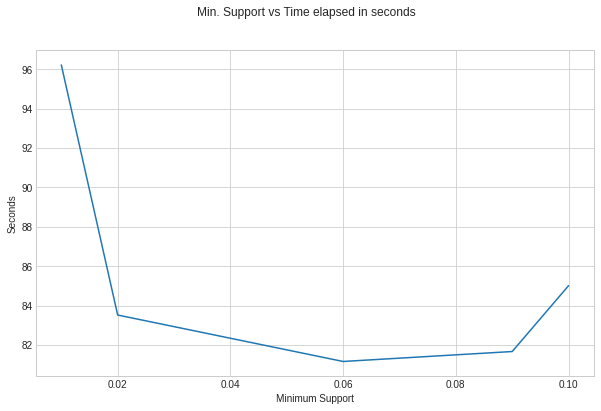

In [88]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = [10,6]

fig = plt.figure()
plt.plot(fp_th_pd["Threshold"],fp_th_pd["Time Elapsed(seconds)"])
fig.suptitle('Min. Support vs Time elapsed in seconds')
plt.xlabel('Minimum Support')
plt.ylabel('Seconds')


In [89]:
fp_frac_pd["Fraction"] = pd.to_numeric(fp_frac_pd["Fraction"])
fp_frac_pd["Time Elapsed(seconds)"] = pd.to_numeric(fp_frac_pd["Time Elapsed(seconds)"])

Text(0, 0.5, 'Seconds')

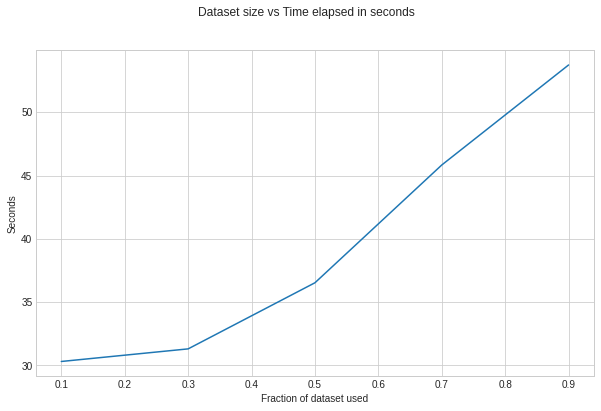

In [90]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = [10,6]

fig = plt.figure()
plt.plot(fp_frac_pd["Fraction"],fp_frac_pd["Time Elapsed(seconds)"])
fig.suptitle('Dataset size vs Time elapsed in seconds')
plt.xlabel('Fraction of dataset used')
plt.ylabel('Seconds')


In [36]:
words_basket = spark_eng.select('words_clean').collect()


list_words_baskets = [ row[0] for row in words_basket]

# Save the actor baskets list
f = open('list_words_baskets.txt','w')
for el in list_words_baskets:
    f.write(str(el)+'\n')
f.close()

In [37]:
my_file = open("list_words_baskets.txt", "r")
list_loaded = my_file.readlines()
list_words_baskets = [eval(el) for el in list_loaded]

In [38]:
import numpy as np
np.random.seed(1)
random_ind = np.random.choice(range(len(list_words_baskets)), 10000, replace=False)
try_set = [list_words_baskets[i] for i in random_ind]
len(try_set)

10000

In [104]:
#Free RAM
del(spark)
del(sc)
del(num_items)
del(num_baskets)
del(spark_eng)
del(data_collection)
del(df_combined)
del(SparkSession)
del(SparkConf)
del(SparkContext)
del(FPGrowth)

In [39]:
from mlxtend.frequent_patterns import apriori
from mlxtend.preprocessing import TransactionEncoder
import plotly.express as px
from tqdm import tqdm
import pandas as pd
import numpy as np
import time 

In [65]:
th_res = [0.01,0.02,0.06,0.09,0.1]
apriori_time_res = {}
for th in th_res:
    te = TransactionEncoder()
    oht_ary = te.fit(try_set).transform(try_set, sparse=True)
    sparse_df = pd.DataFrame.sparse.from_spmatrix(oht_ary, columns=te.columns_)
    start_time = time.time()
    res= apriori(sparse_df, min_support=th, use_colnames=True)
    apriori_time_res[th] = time.time() - start_time

In [66]:
apriori_time_res

{0.01: 24.4316885471344,
 0.02: 13.68343448638916,
 0.06: 15.196359157562256,
 0.09: 13.404382944107056,
 0.1: 12.053977251052856}

In [67]:
ap_th_res = pd.DataFrame.from_dict(apriori_time_res, orient="index").reset_index()

new_column_list= ["Threshold","Time Elapsed"]

ap_th_res = ap_th_res.set_axis(new_column_list, axis=1)
ap_th_res

,Threshold,Time Elapsed
0,0.01,24.431689
1,0.02,13.683434
2,0.06,15.196359
3,0.09,13.404383
4,0.10,12.053977


In [82]:
te = TransactionEncoder()
oht_ary = te.fit(try_set).transform(try_set, sparse=True)
sparse_df = pd.DataFrame.sparse.from_spmatrix(oht_ary, columns=te.columns_)
res= apriori(sparse_df, min_support=0.02, use_colnames=True)


In [83]:
len(res)

321

In [73]:
res.sort_values(by=['support'],ascending=False).head(10)

,support,itemsets
16,0.5980,(ukraine)
7,0.3225,(russia)
32,0.2124,"(russia, ukraine)"
6,0.2035,(putin)
8,0.1681,(russian)
23,0.1307,(war)
30,0.1099,"(putin, ukraine)"
34,0.1065,"(russian, ukraine)"
3,0.0894,(nato)
4,0.0878,(people)


In [75]:
fraction_sample = [0.1,0.3,0.5,0.7,0.9]
apriori_time_res_frac = {}
for fr in tqdm(fraction_sample):
    list_frac = try_set[0:round(fr*len(try_set))]
    te = TransactionEncoder() 
    oht_ary = te.fit(try_set).transform(try_set, sparse=True)
    sparse_df = pd.DataFrame.sparse.from_spmatrix(oht_ary, columns=te.columns_)
    start_time = time.time()
    res= apriori(sparse_df, min_support=0.04, use_colnames=True)
    apriori_time_res_frac[fr] = time.time() - start_time

100%|██████████| 5/5 [01:34<00:00, 18.96s/it]


In [77]:
apriori_time_res_frac

{0.1: 17.11443591117859,
 0.3: 16.745912075042725,
 0.5: 16.8118577003479,
 0.7: 16.4901442527771,
 0.9: 17.582629680633545}

In [78]:
apriori_time_res_frac = pd.DataFrame.from_dict(apriori_time_res_frac, orient="index").reset_index()

new_column_list= ["Fraction","Time Elapsed"]

apriori_time_res_frac = apriori_time_res_frac.set_axis(new_column_list, axis=1)
apriori_time_res_frac

,Fraction,Time Elapsed
0,0.1,17.114436
1,0.3,16.745912
2,0.5,16.811858
3,0.7,16.490144
4,0.9,17.582630


Text(0, 0.5, 'Seconds')

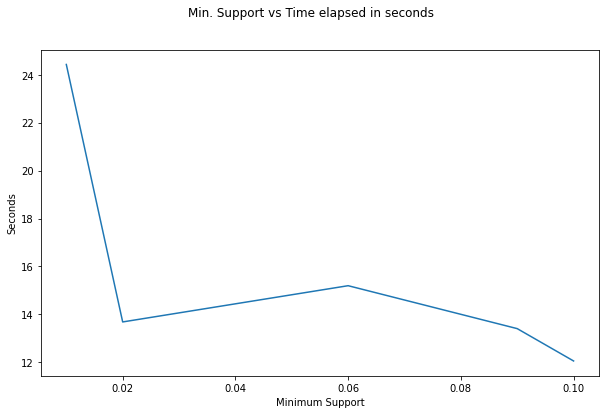

In [80]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = [10,6]

fig = plt.figure()
plt.plot(ap_th_res["Threshold"],ap_th_res["Time Elapsed"])
fig.suptitle('Min. Support vs Time elapsed in seconds')
plt.xlabel('Minimum Support')
plt.ylabel('Seconds')


Text(0, 0.5, 'Seconds')

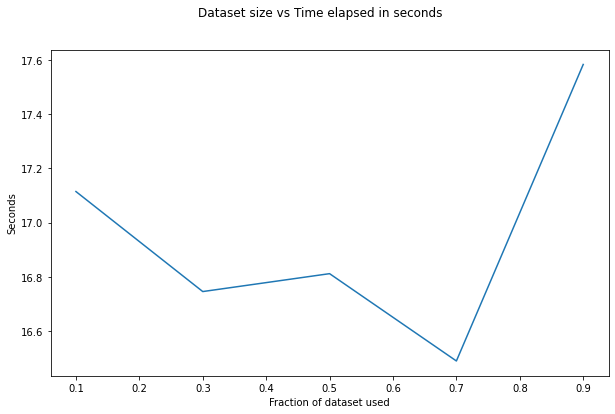

In [81]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = [10,6]

fig = plt.figure()
plt.plot(apriori_time_res_frac["Fraction"],apriori_time_res_frac["Time Elapsed"])
fig.suptitle('Dataset size vs Time elapsed in seconds')
plt.xlabel('Fraction of dataset used')
plt.ylabel('Seconds')
